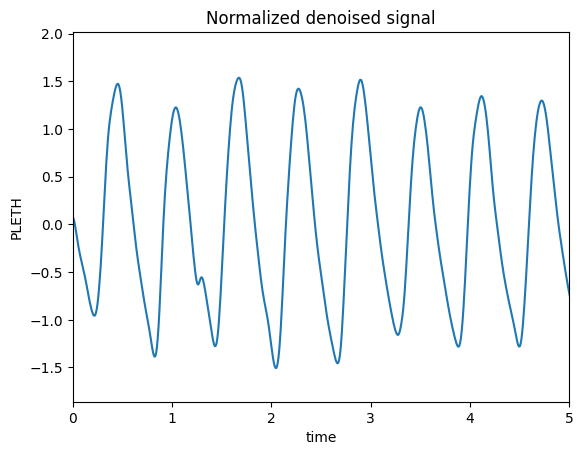

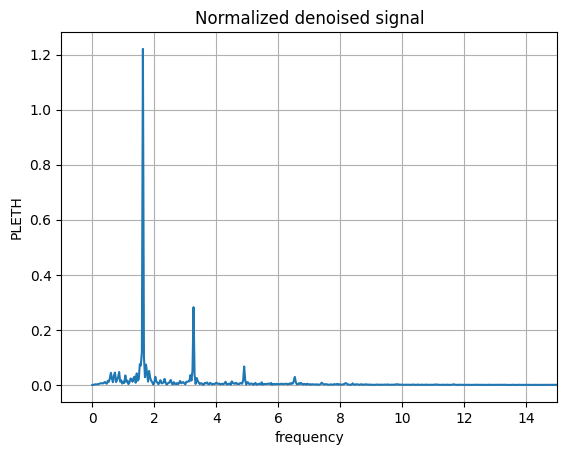

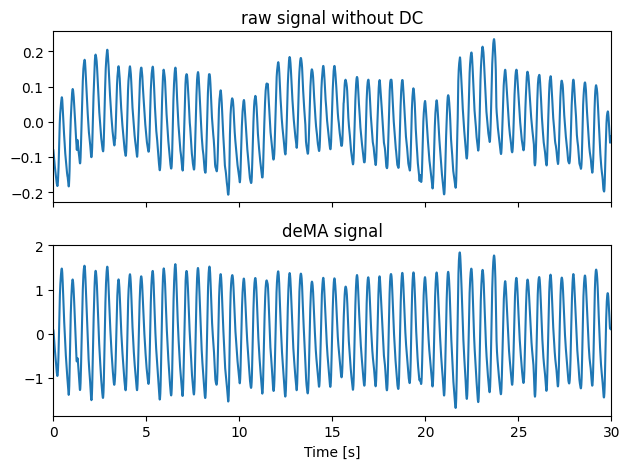

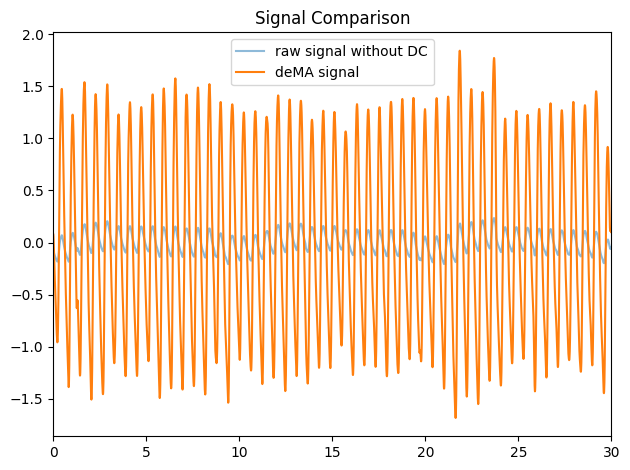

In [2]:
from BIDMC_Preprocess import *

path = r"D:\桌面\ENG573\data\BIDMC_Split\05\seg_0.csv"
denoised_path = r"D:\桌面\ENG573\data\BIDMC_Denoised\05\seg_0_d.csv"
df = pd.read_csv(path)
t = df['Time [s]']
PLETH = df[' PLETH']
frequency = 125

df_d = pd.read_csv(denoised_path)
PLETH_d = df_d[' PLETH']
wave_visualize(t-t[0],PLETH_d,"Normalized denoised signal", duration=5)
compare_in_t(t, PLETH-np.mean(PLETH), "raw signal without DC", PLETH_d, "deMA signal",duration=30)

In [5]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PLETH_clean = nk.ppg_clean(PLETH, sampling_rate=125)
# wave_visualize(t,PLETH_clean,"cleaned signal", duration=30)

49
{np.str_('1'):              Signal  Index Label
-0.183422 -0.665895     33     1
-0.175270 -0.558408     34     1
-0.167118 -0.435833     35     1
-0.158965 -0.298900     36     1
-0.150813 -0.149319     37     1
...             ...    ...   ...
 0.395376 -1.378126    104     1
 0.403528 -1.342330    105     1
 0.411680 -1.277284    106     1
 0.419832 -1.182408    107     1
 0.427984 -1.058575    108     1

[76 rows x 3 columns], np.str_('2'):              Signal  Index Label
-0.183422 -1.182408    107     2
-0.175270 -1.058575    108     2
-0.167118 -0.908141    109     2
-0.158965 -0.735561    110     2
-0.150813 -0.547911    111     2
...             ...    ...   ...
 0.395376 -1.260999    178     2
 0.403528 -1.276954    179     2
 0.411680 -1.273123    180     2
 0.419832 -1.246088    181     2
 0.427984 -1.193757    182     2

[76 rows x 3 columns], np.str_('3'):              Signal  Index Label
-0.183422 -0.748646    186     3
-0.175270 -0.595221    187     3
-0.167118 -0.43

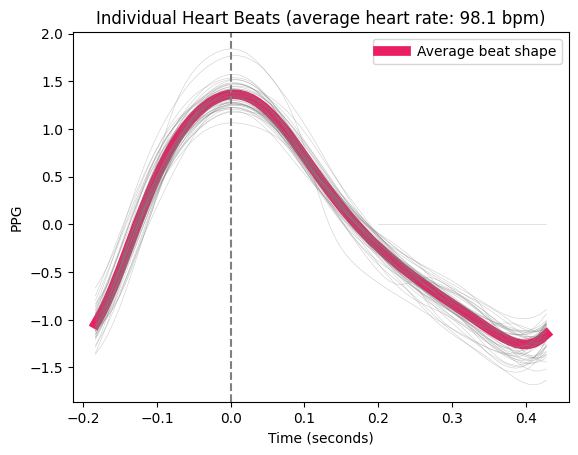

In [6]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

segments = nk.ppg_segment(PLETH_d, sampling_rate=125, show=True)

print(len(segments))

i = len(segments)-1
PLETH_Seg = segments[f"{i}"].Signal

print(segments)

In [7]:
def PlotSeg(PLETH_Seg: list[float], fs: int=125, peaks: list[int]=[], foots: list[int]=[]):
    N = len(PLETH_Seg)
    T = (N - 1) / fs

    t_Seg = np.linspace(0, T, N)

    plt.figure()
    plt.plot(t_Seg, PLETH_Seg)

    for peak in peaks:
        plt.plot(peak/fs, PLETH_Seg[peak], 'ro')

    for foot in foots:
        plt.plot(foot/fs, PLETH_Seg[foot], 'bo')
        
    plt.xlabel('time')
    plt.ylabel('PLETH')
    plt.show()

In [8]:
SegList = []
IdxList = []
# the last segment is always 0, just ignor it
for i in range(1,len(segments)):
    SegList.append((segments[f"{i}"].Signal.to_list()))
    IdxList.append((segments[f"{i}"].Index.to_list()))

# print(len(SegList))
# PlotSeg(SegList[-1])
    
PeakList = [np.max(Seg) for Seg in SegList]   
# print(PeakList[33])
# print(np.max(SegList[33]))

PeaskAve = np.mean(PeakList)
# print(PeaskAve)

SegList_Selected = []
SegList_Ignor = []
IdxList_Selected = []
IdxList_Ignor = []
for i in range(len(PeakList)):

    if PeakList[i] > PeaskAve*0.5:
        SegList_Selected.append(SegList[i])
        IdxList_Selected.append(IdxList[i])

    else:
        SegList_Ignor.append(SegList[i])
        IdxList_Ignor.append(IdxList[i])

print(len(SegList_Ignor))
print(len(SegList_Selected))
print(len(IdxList_Ignor))
print(len(IdxList_Selected))
print(len(PeakList))


0
48
0
48
48


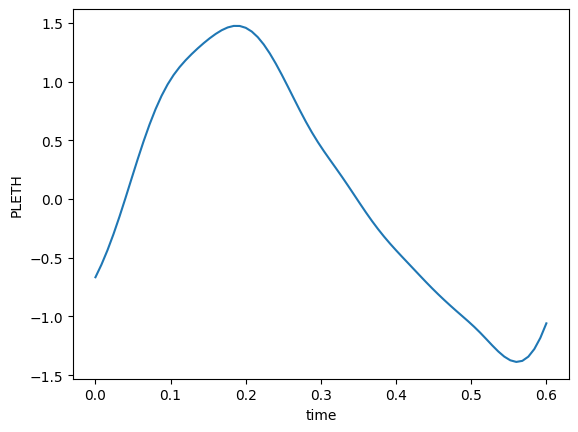

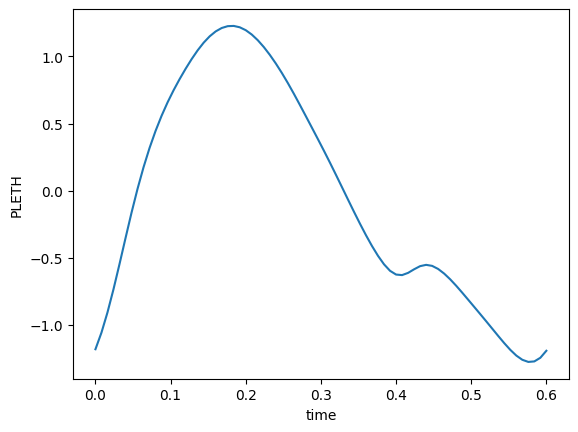

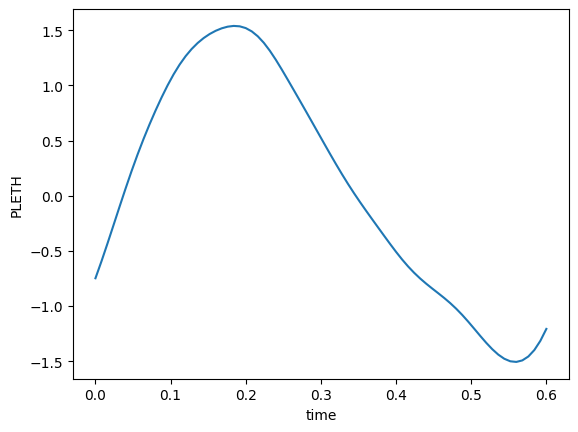

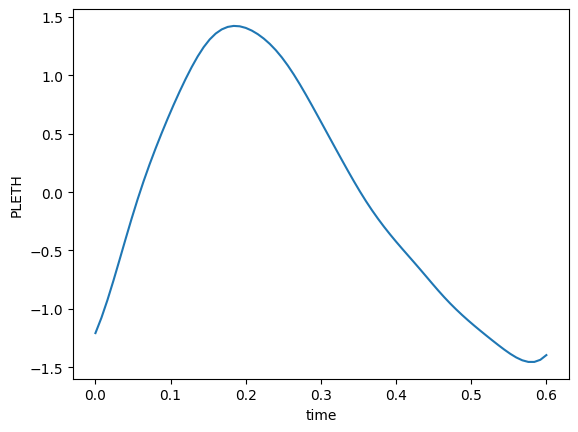

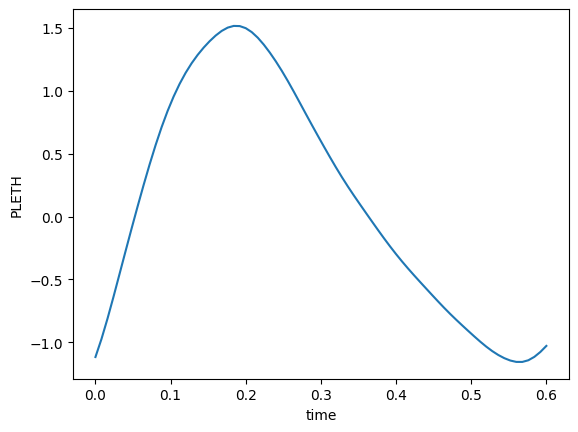

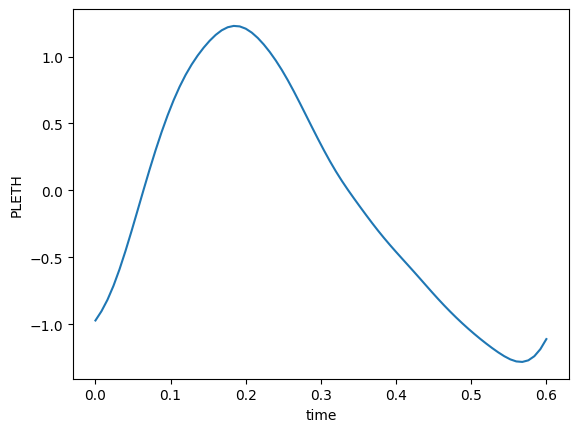

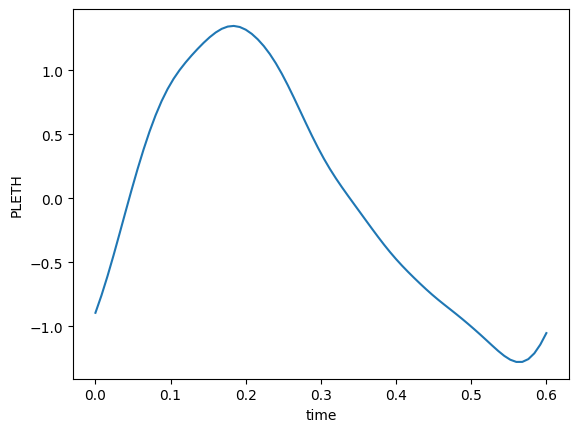

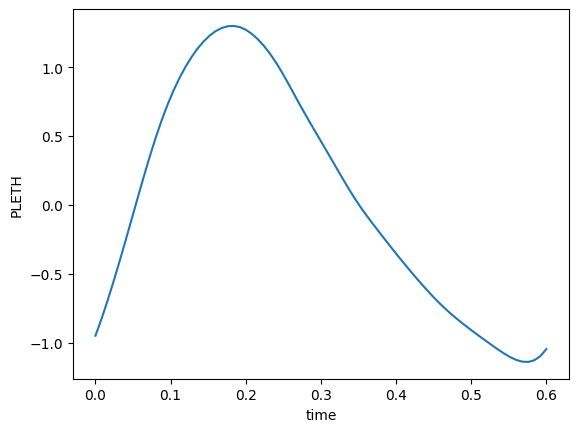

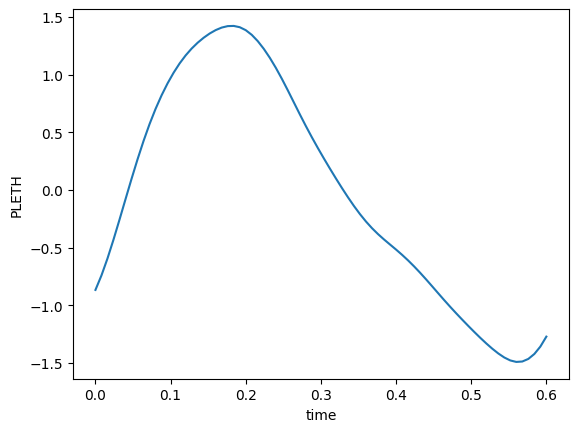

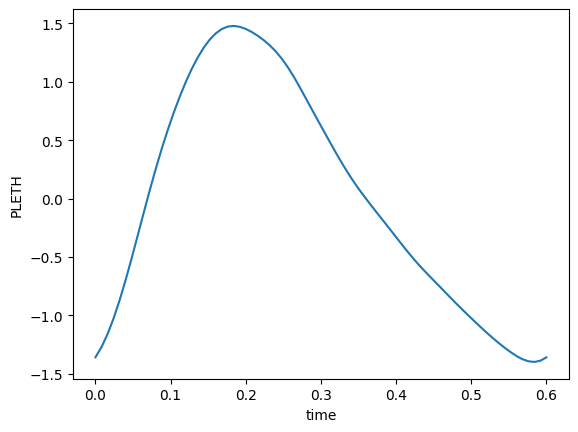

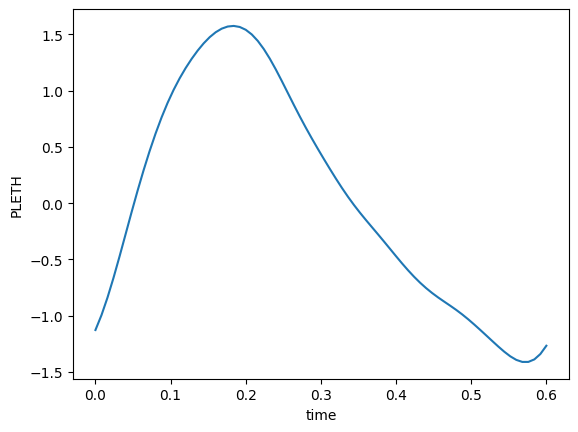

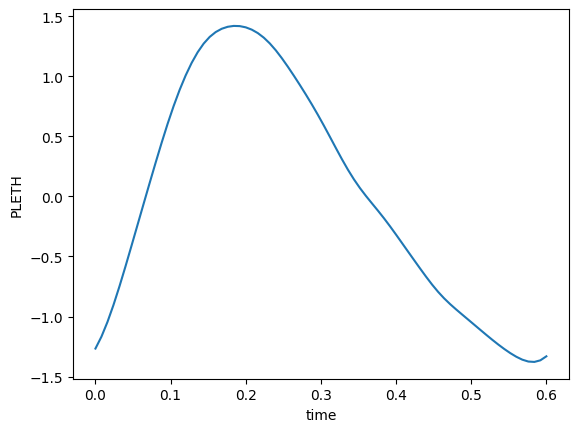

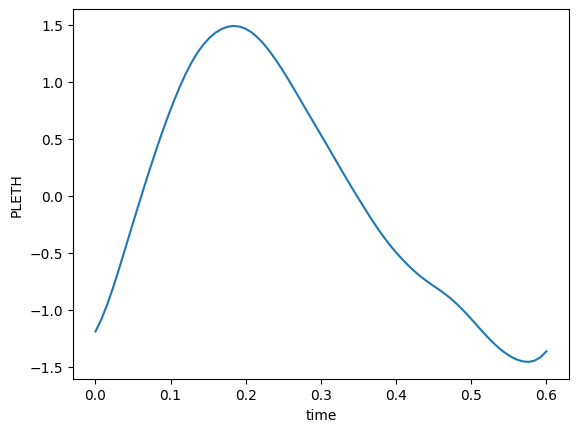

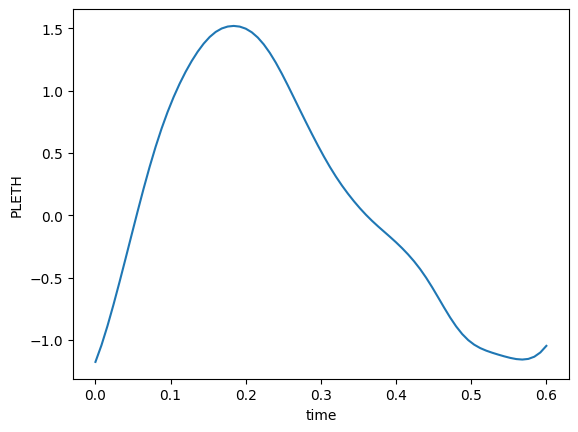

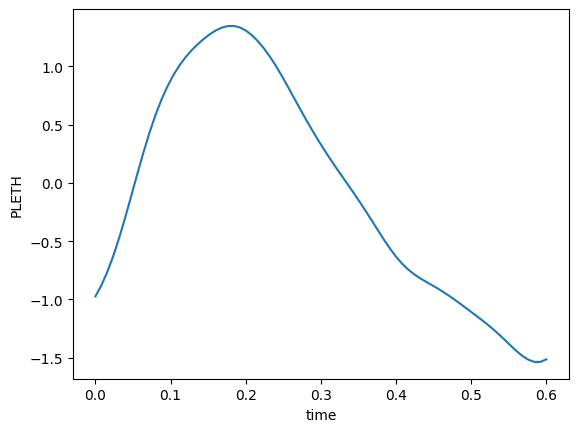

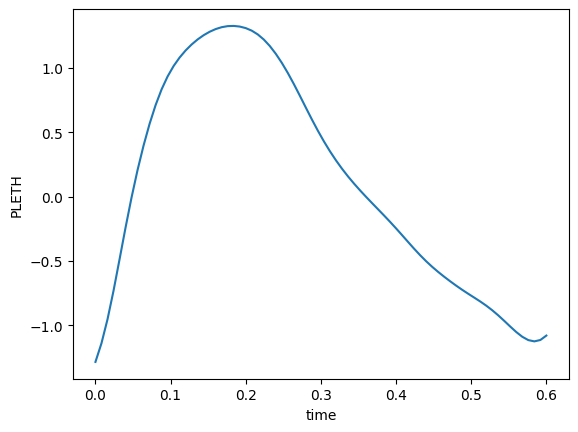

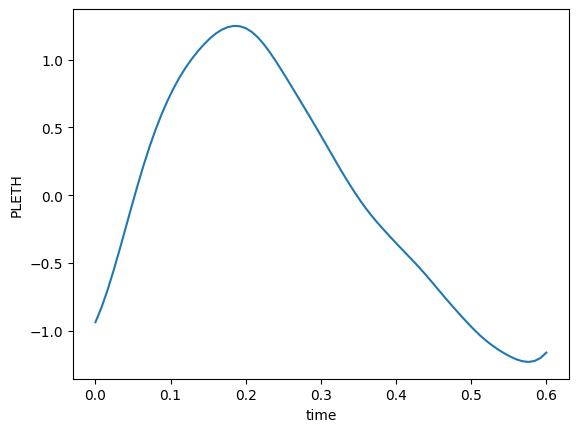

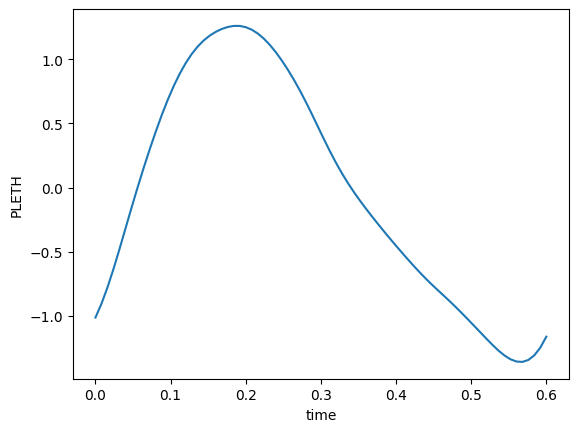

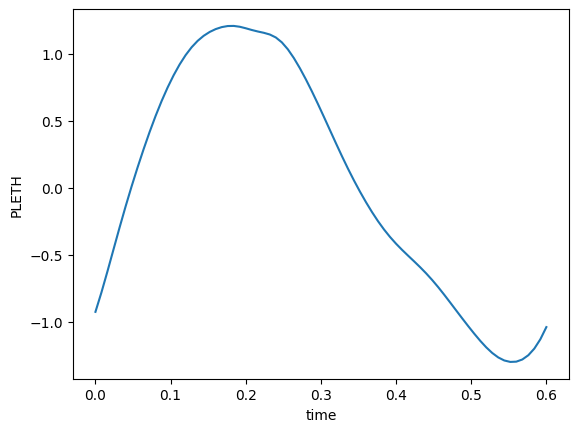

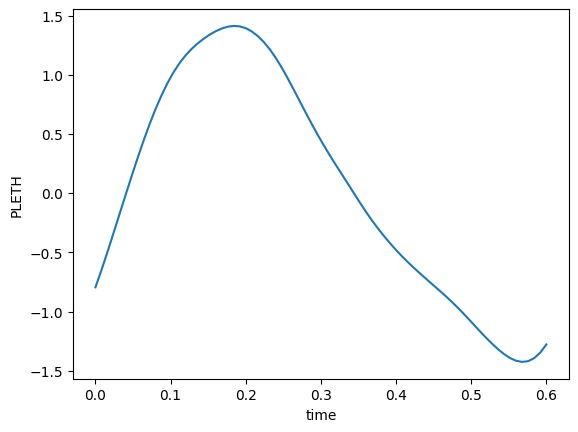

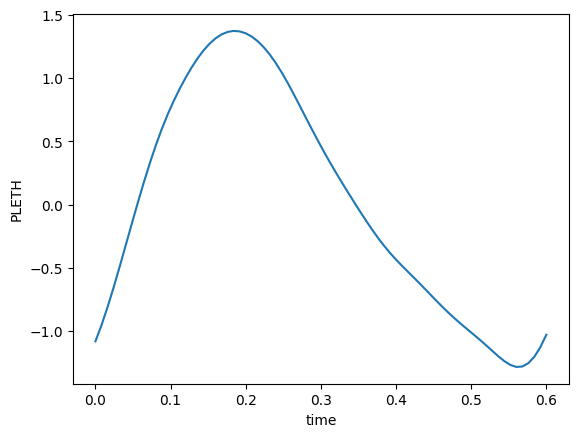

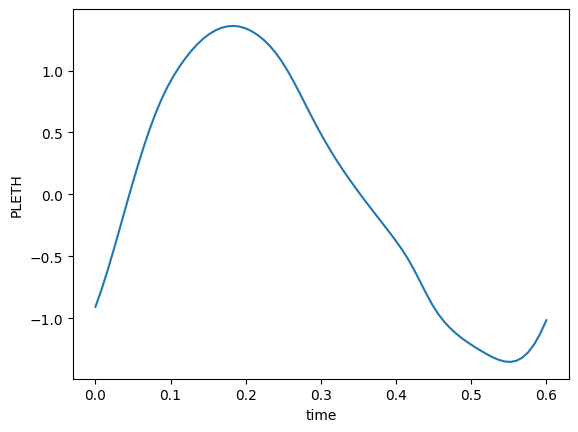

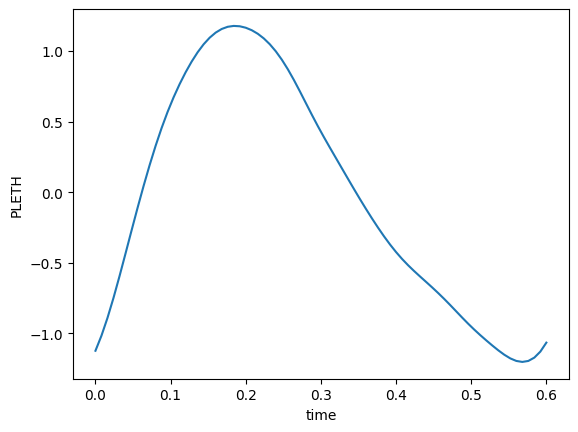

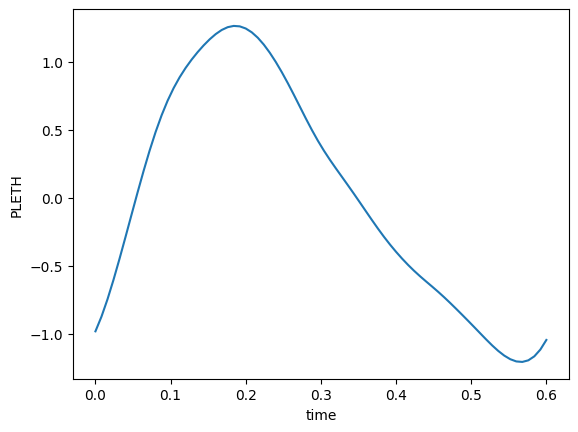

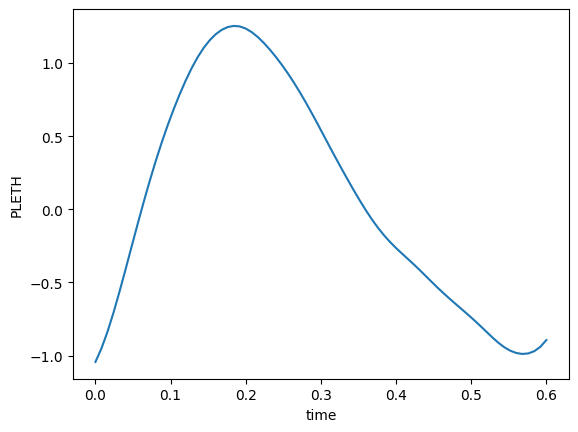

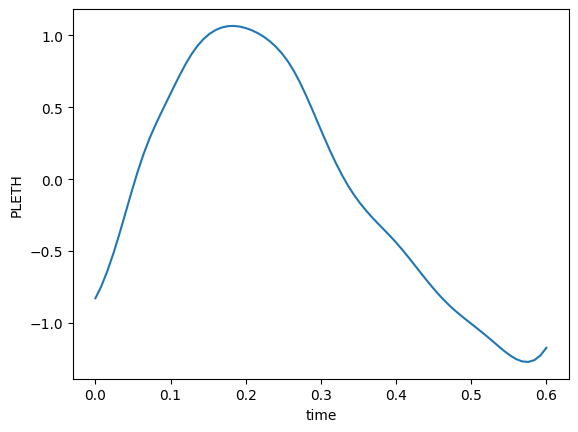

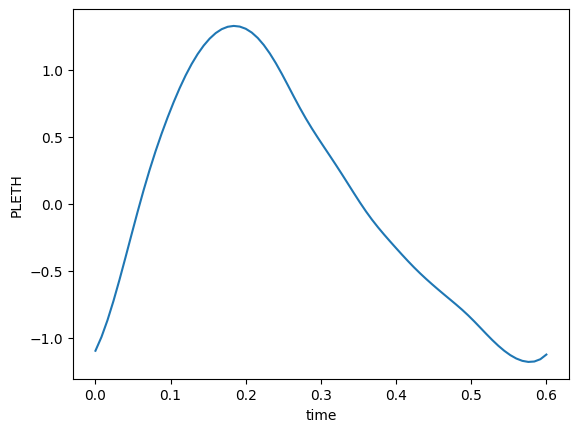

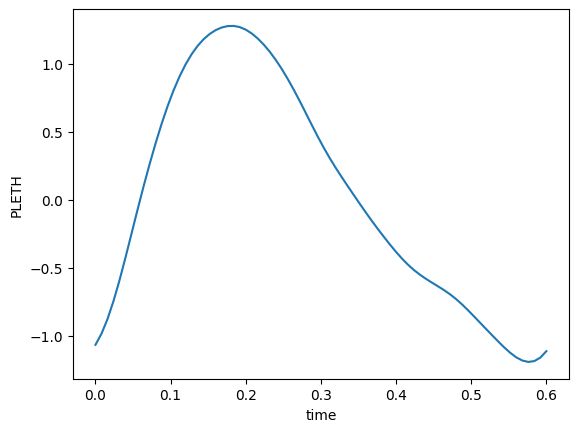

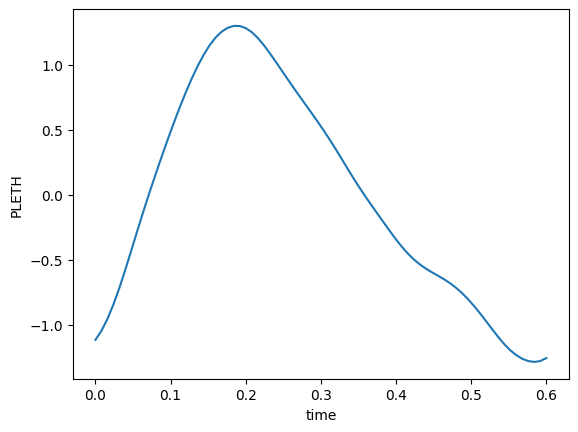

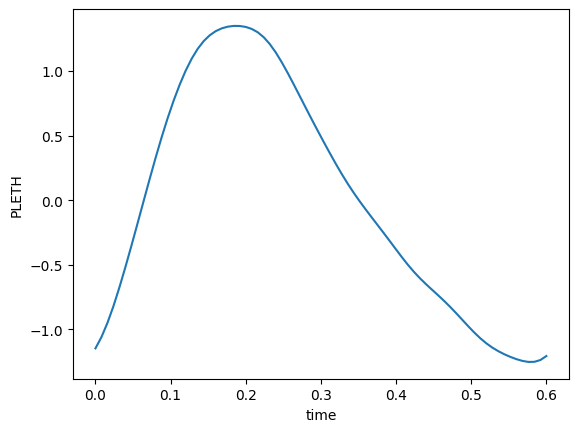

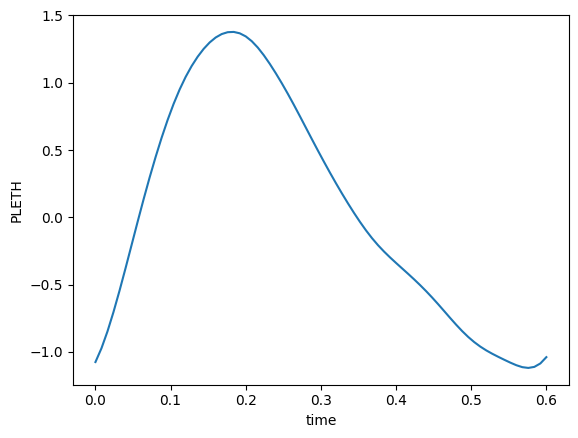

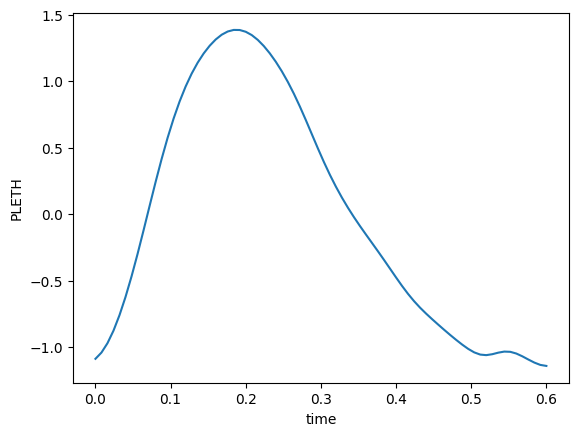

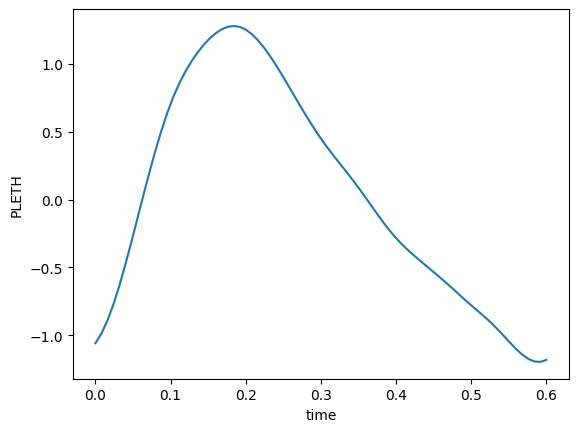

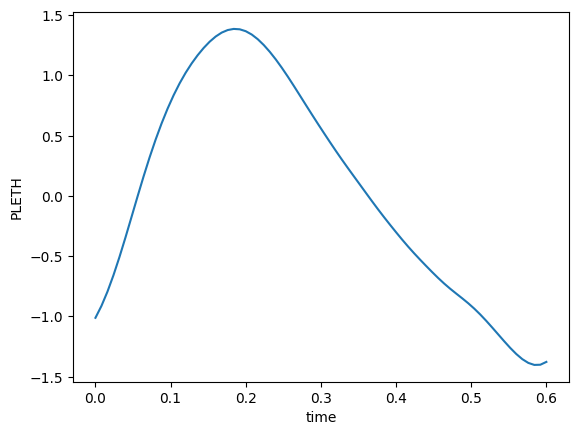

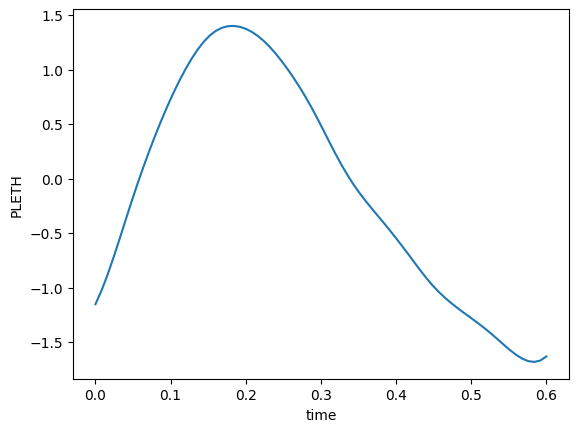

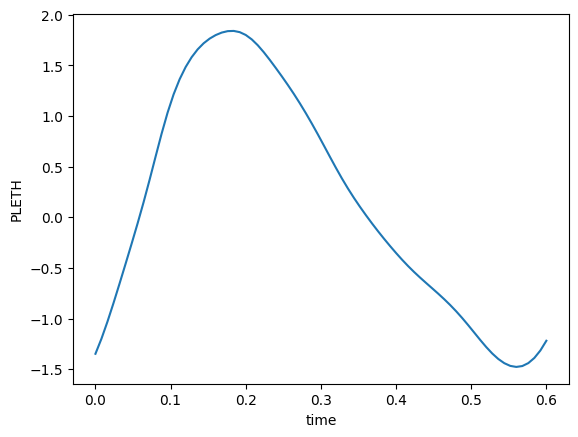

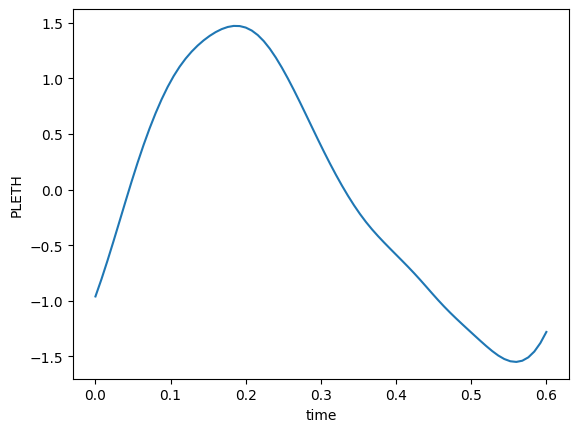

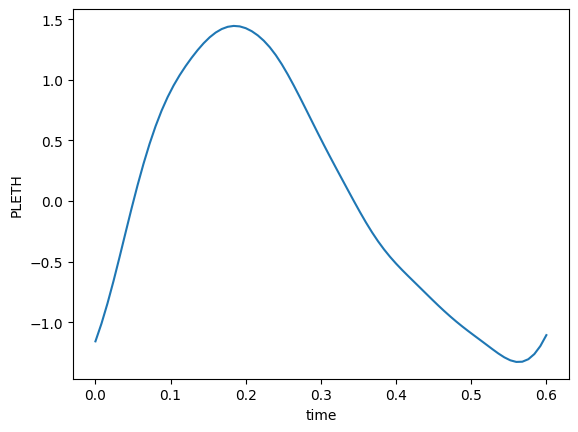

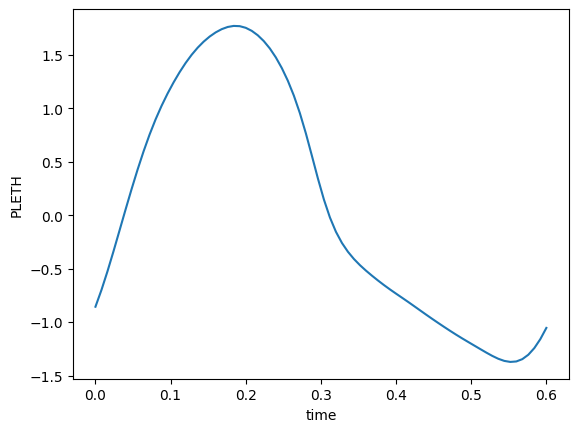

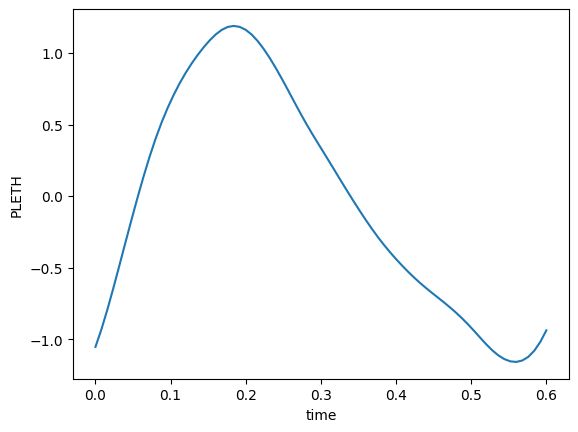

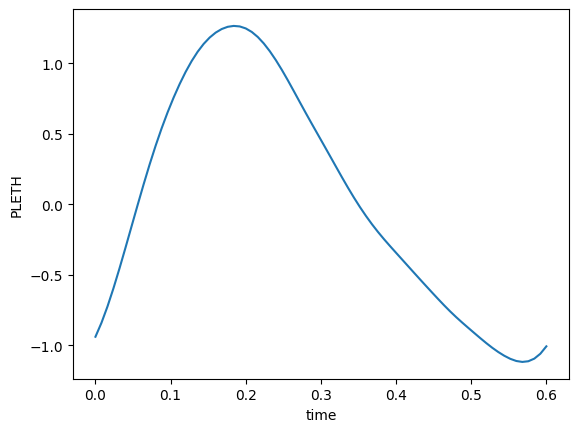

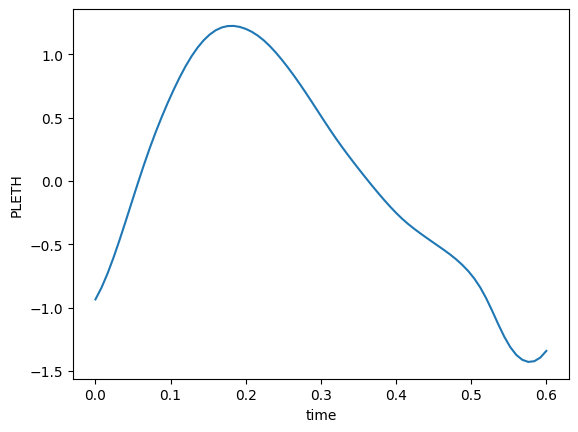

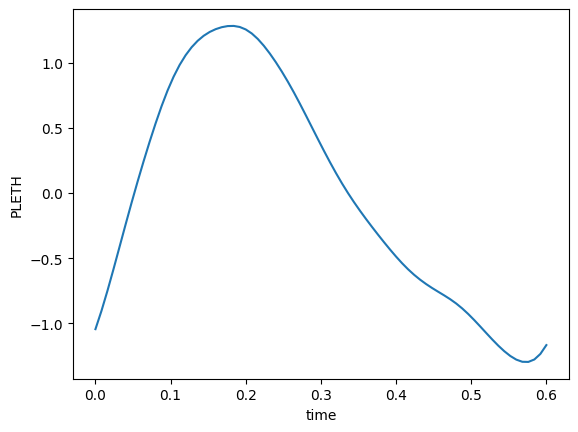

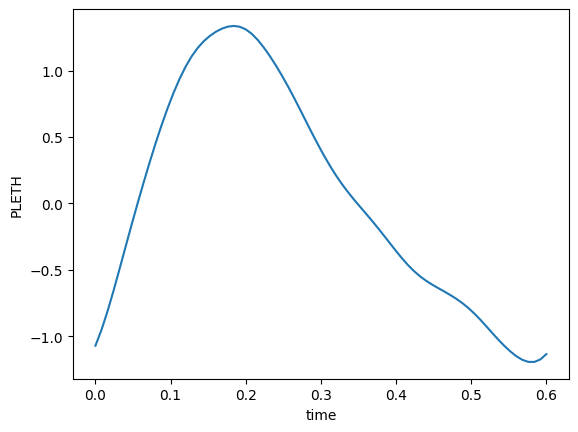

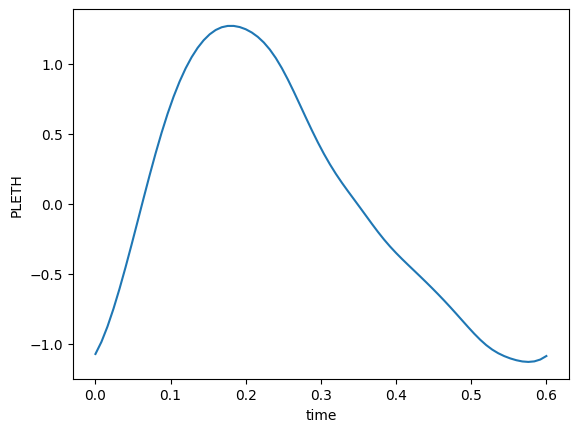

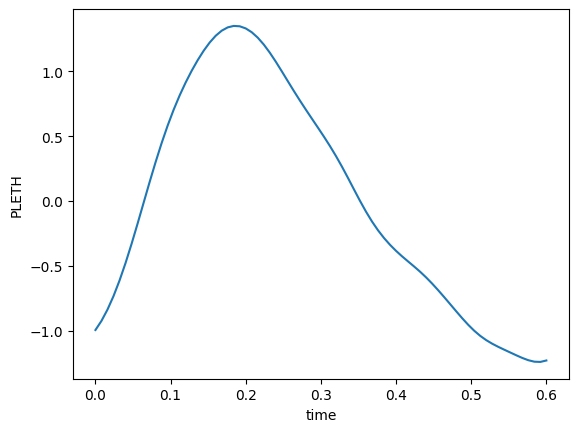

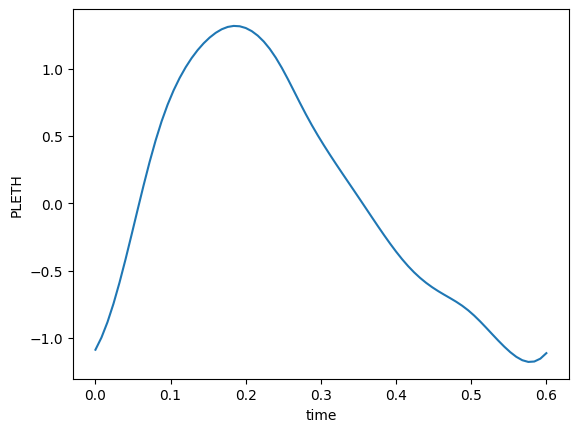

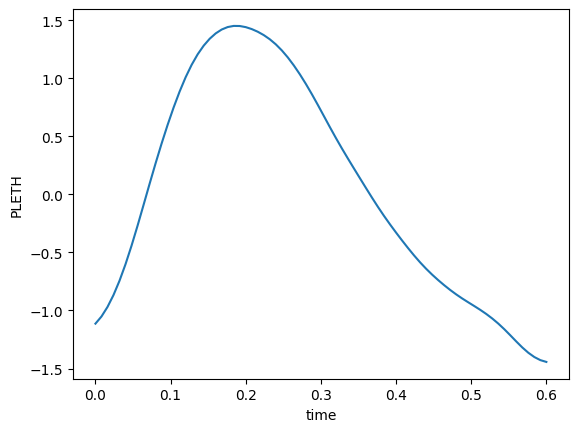

In [9]:
# print(SegList_Ignor[0])
for Seg in SegList_Selected:
    PlotSeg(Seg)

# PlotSeg(SegList_Selected[0])

# fs = 125
# TimeList_selected = np.array(IdxList_Selected)/fs
# TimeList_conc = [time for sublist in TimeList_selected for time in sublist]
# SegList_conc = [PLETH for Seg in SegList_Selected for PLETH in Seg]

# plt.figure()
# plt.plot(TimeList_conc, SegList_conc)
# plt.show()

[23]
[72]


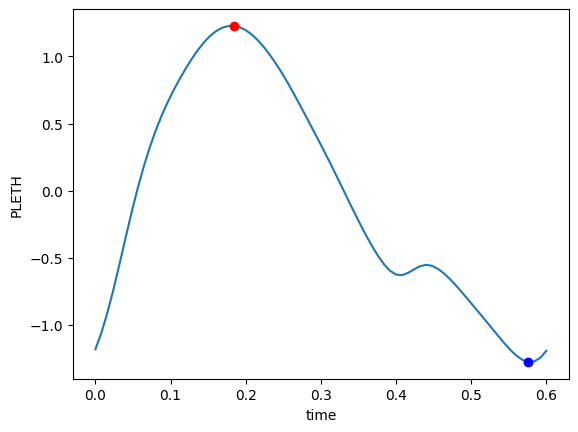

1.04


In [10]:
from scipy.signal import find_peaks

sampling_rate = 125
idx = 1

Seg = SegList_Selected[idx]
# PlotSeg(Seg)
peaks, _ = find_peaks(Seg, distance=sampling_rate//2)
foots, _ = find_peaks(-np.array(Seg), distance=sampling_rate//2)
# foots = np.append(foots, len(Seg)-1)
print(peaks)
print(foots)


# PLETH_Seg = Seg
# fs = sampling_rate
# N = len(PLETH_Seg)
# T = (N - 1) / fs

# t_Seg = np.linspace(0, T, N)

# plt.figure()
# plt.plot(t_Seg, PLETH_Seg)

# for peak in peaks:
#     plt.plot(peak/fs, PLETH_Seg[peak], 'ro')

# for foot in foots:
#     plt.plot(foot/fs, PLETH_Seg[foot], 'bo')
    
# plt.xlabel('time')
# plt.ylabel('PLETH')
# plt.show()

PlotSeg(Seg, peaks=peaks, foots=foots)

t1_actual = IdxList_Selected[idx][peaks[0]] / sampling_rate
print(t1_actual)

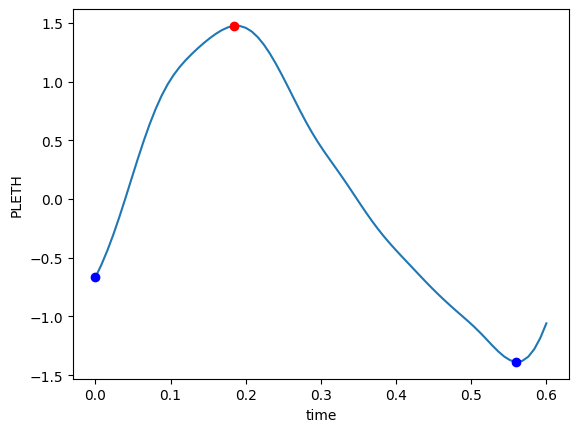

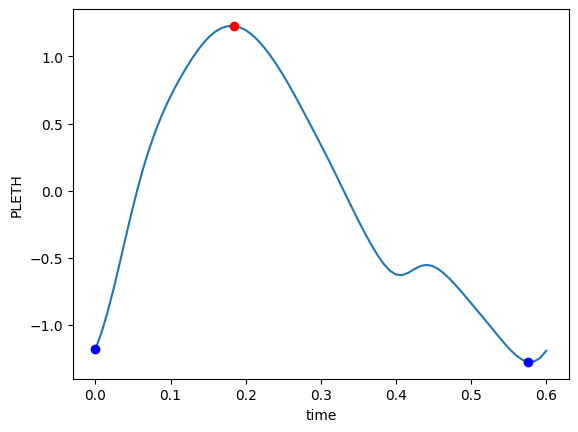

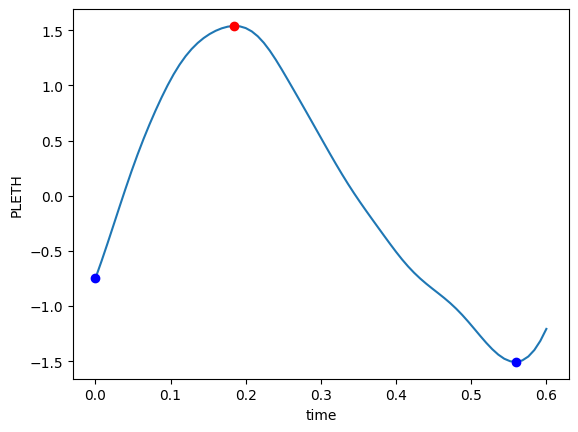

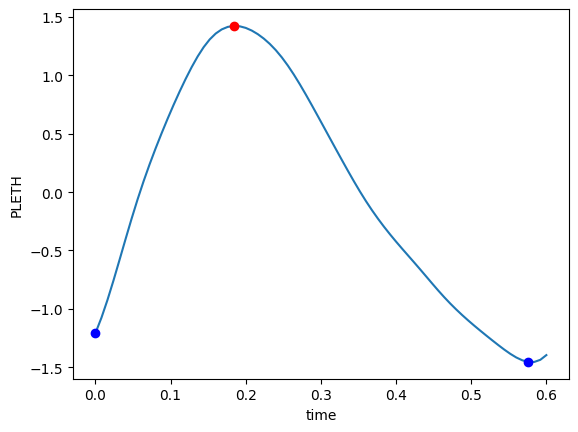

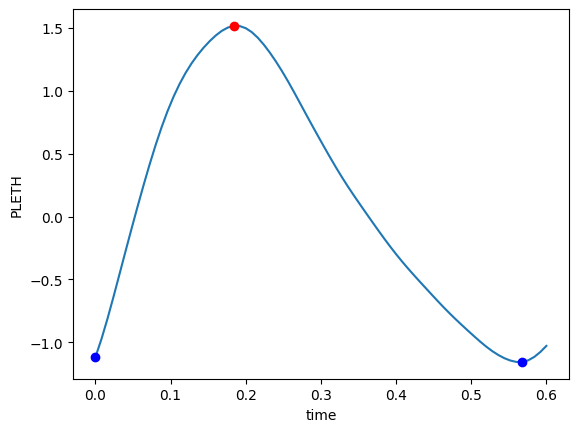

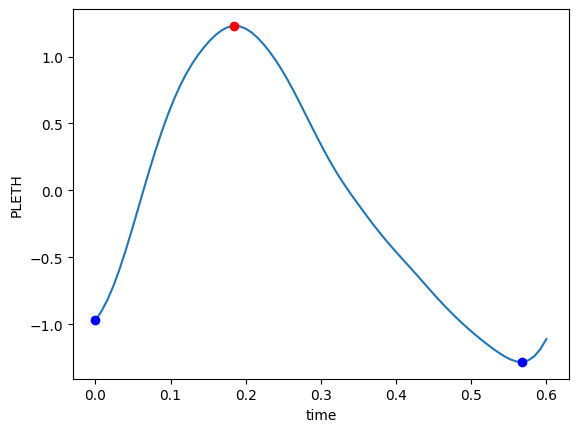

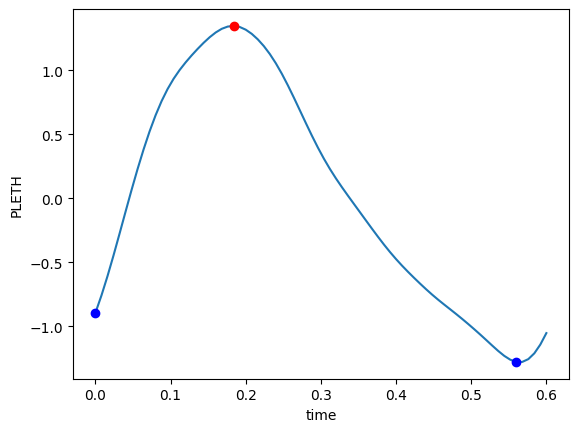

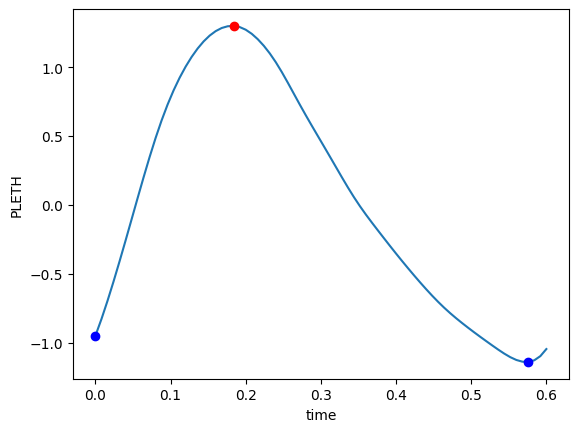

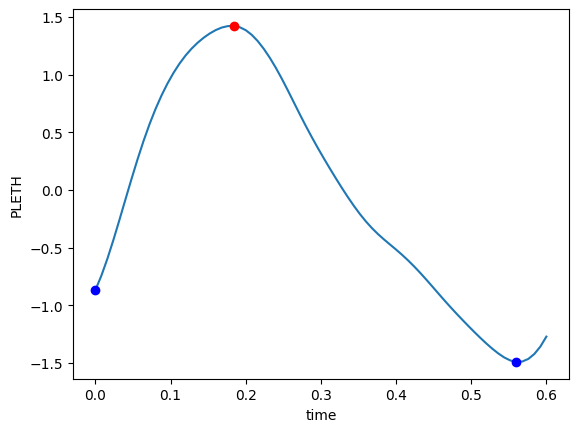

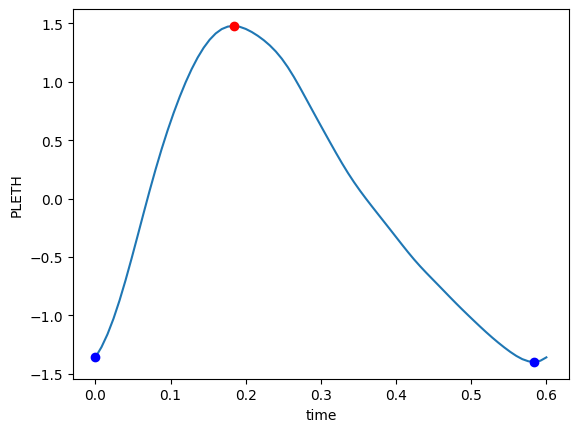

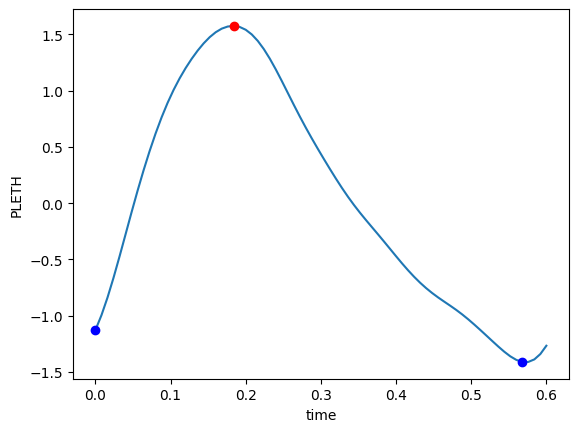

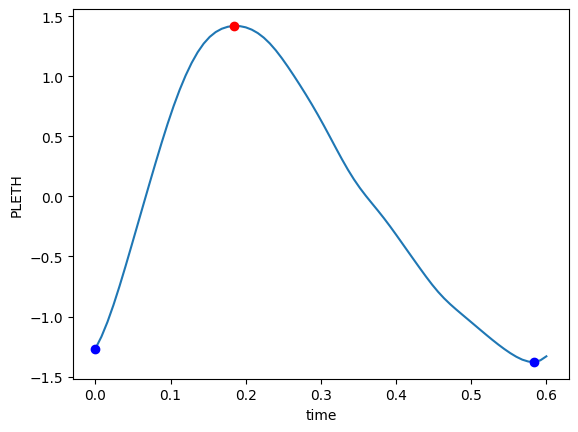

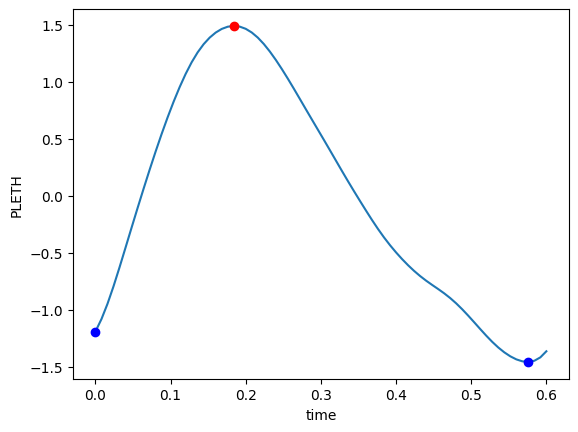

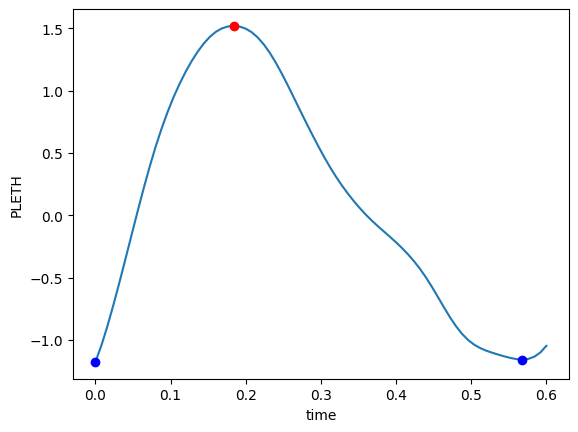

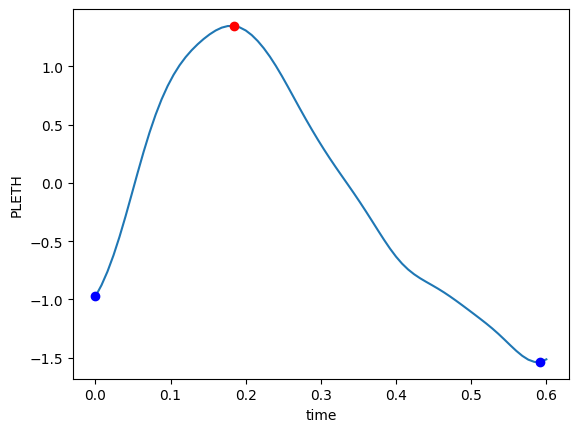

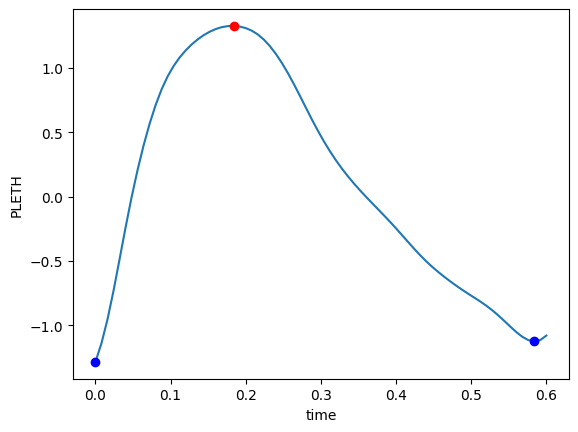

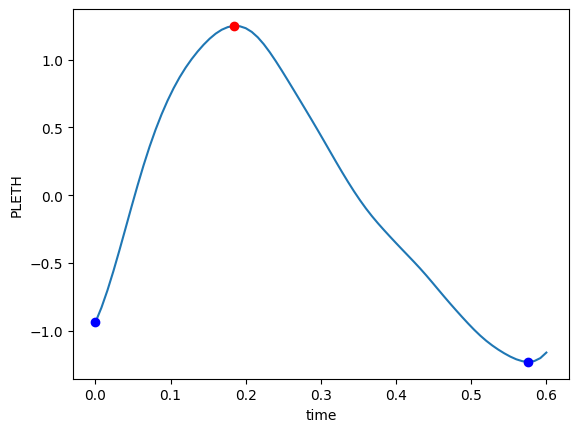

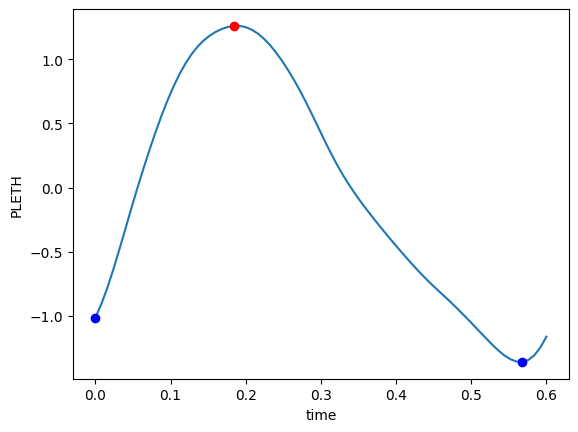

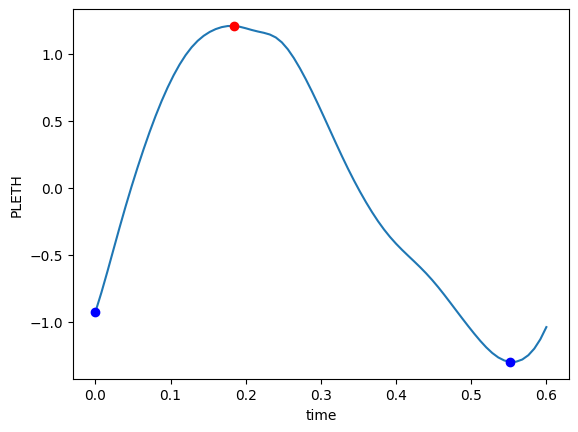

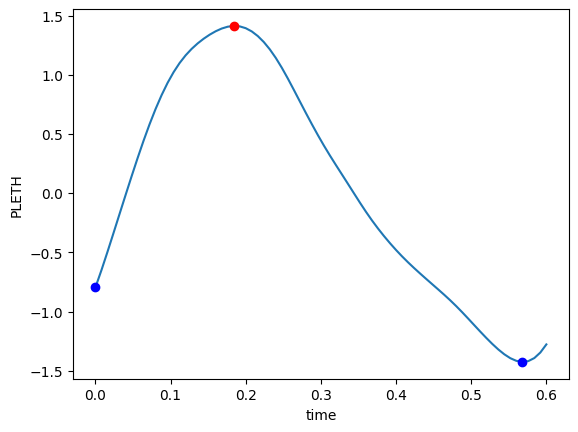

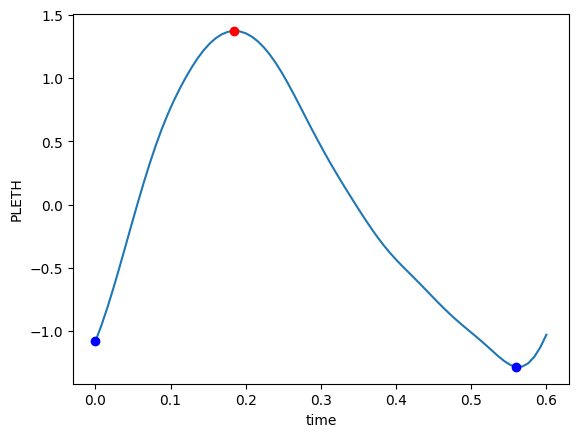

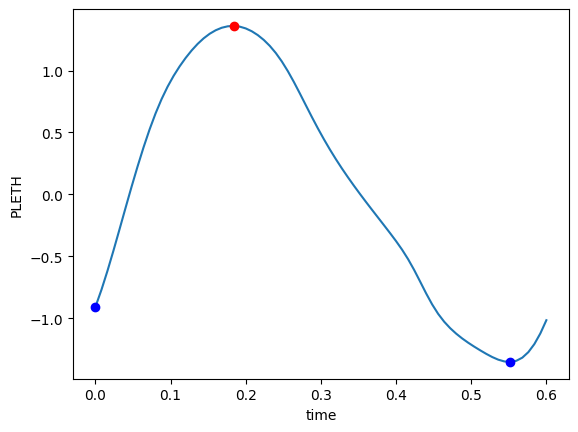

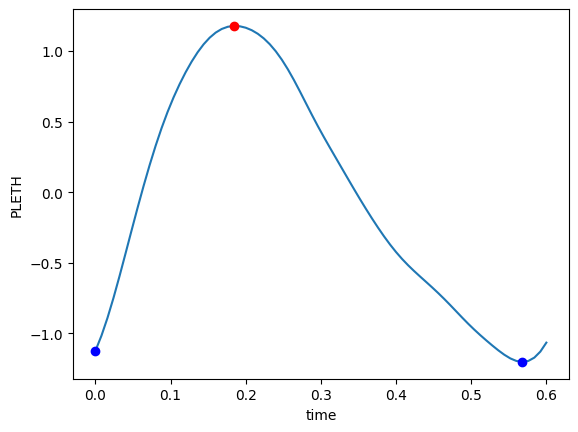

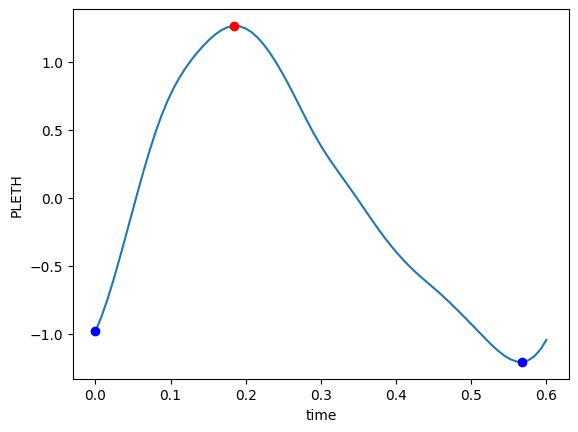

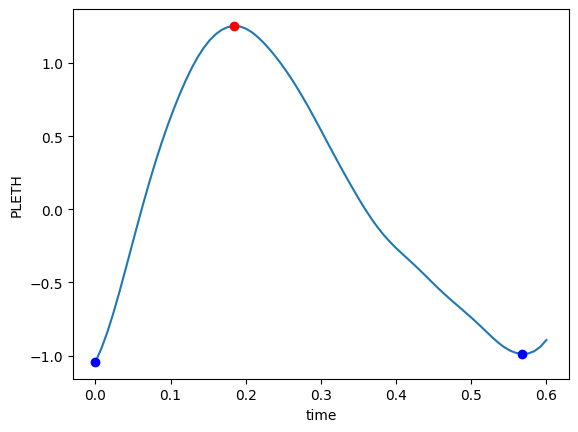

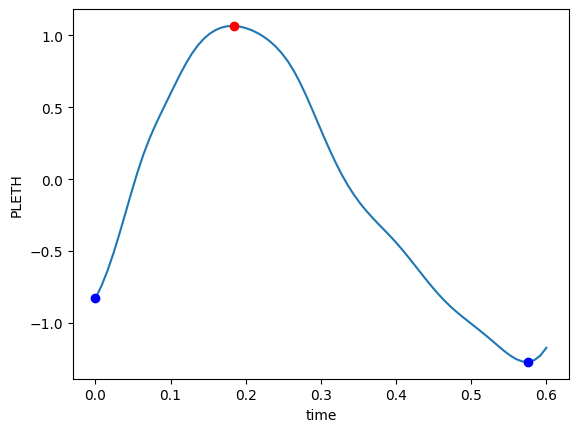

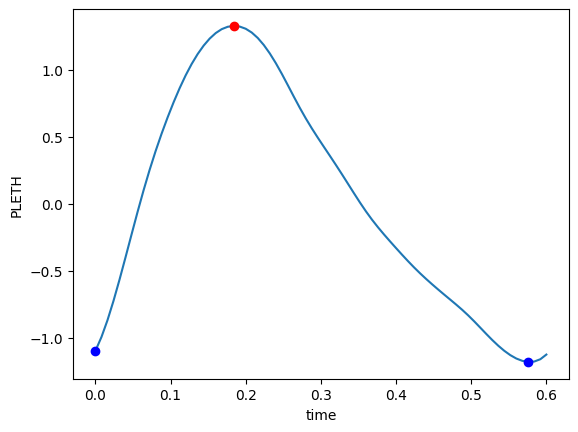

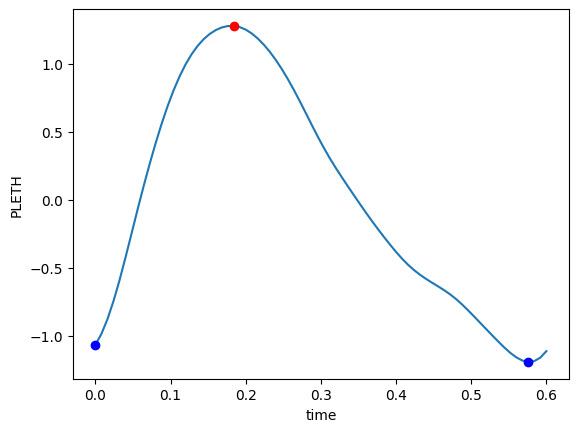

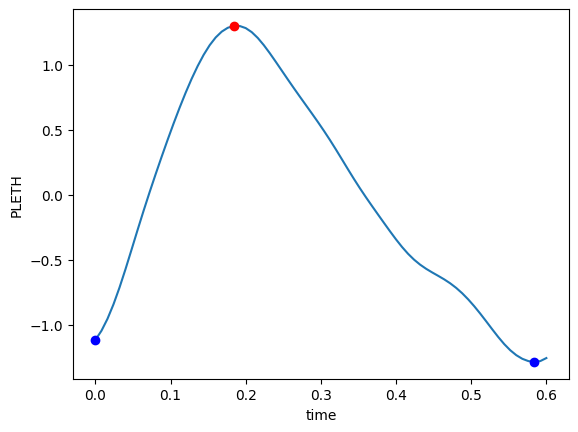

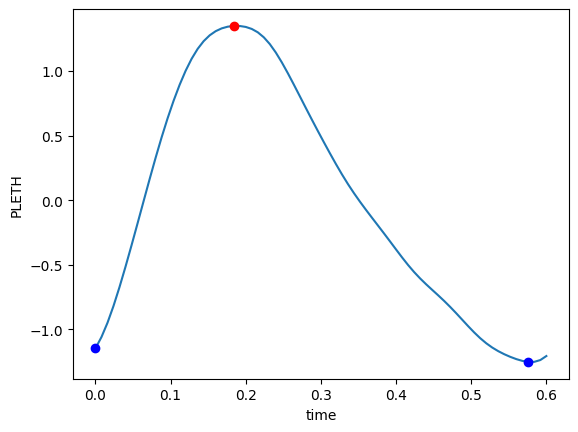

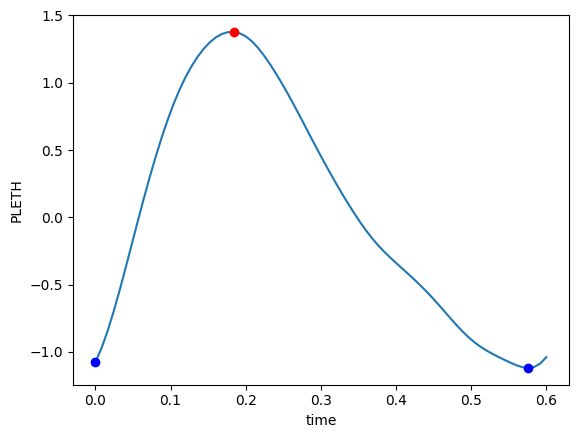

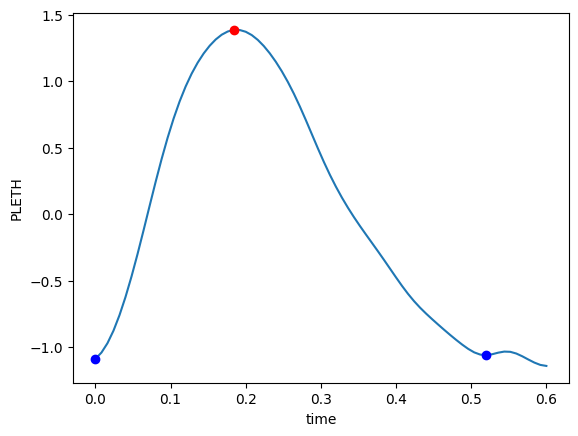

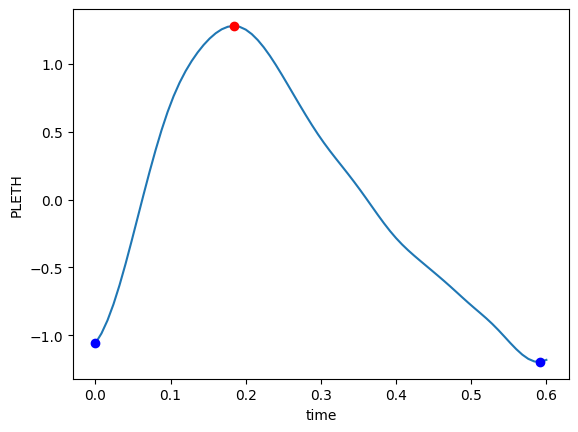

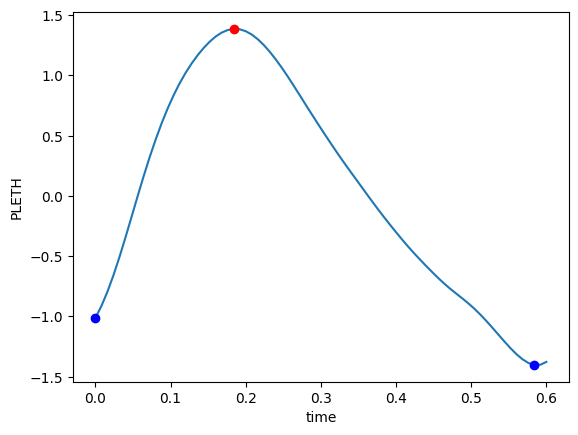

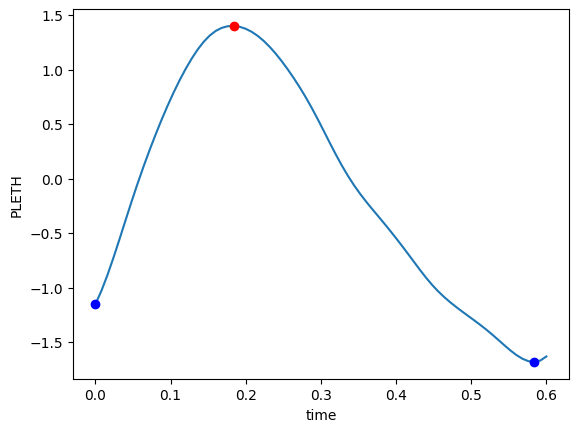

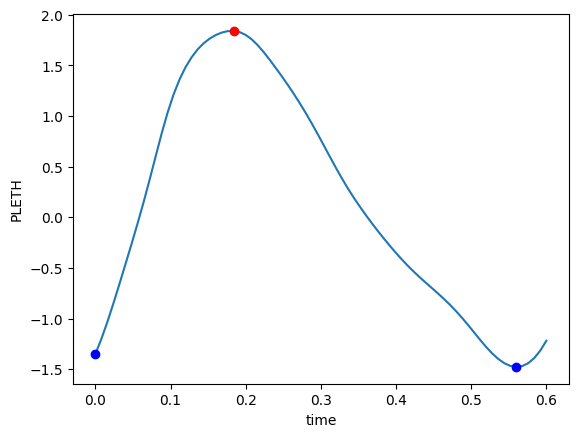

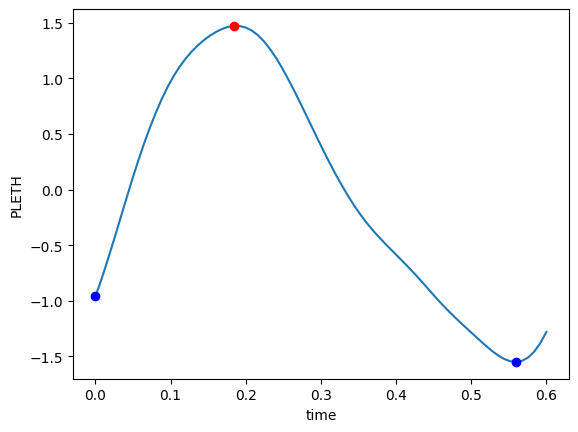

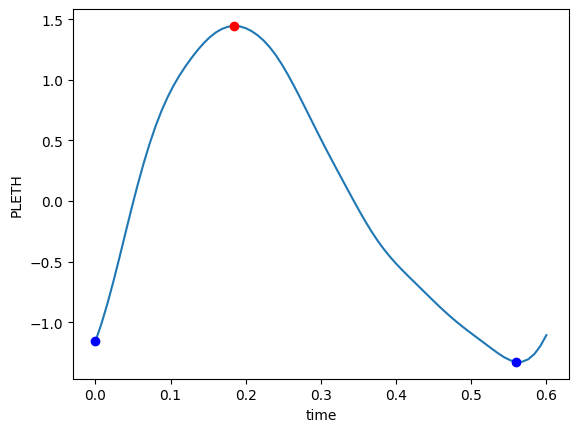

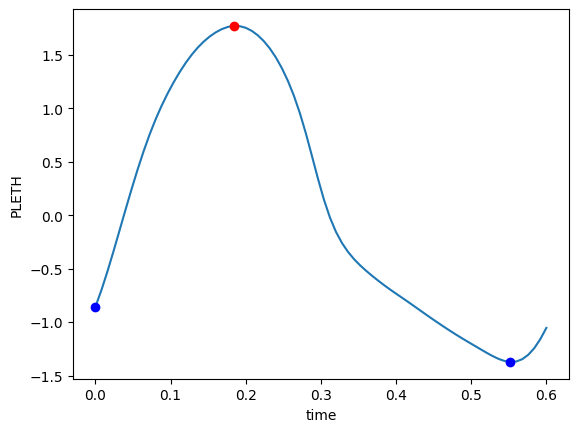

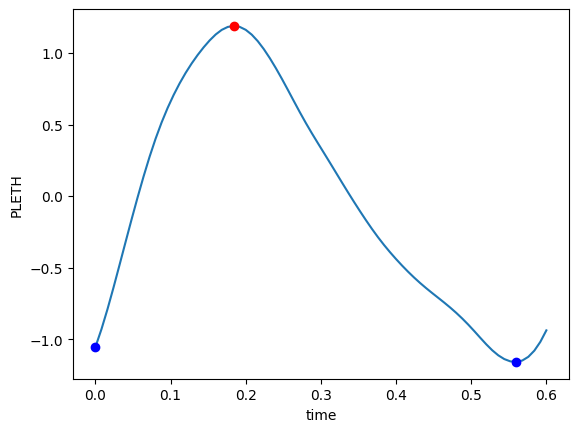

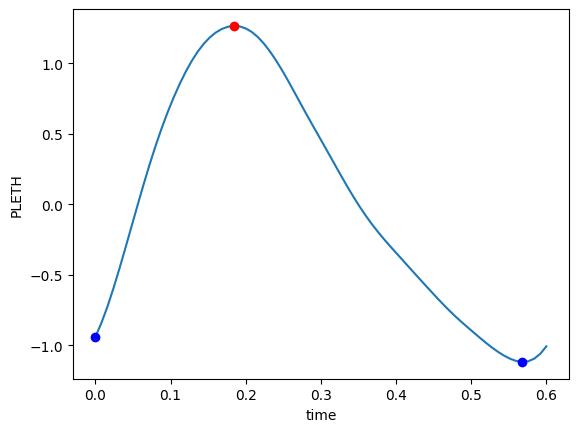

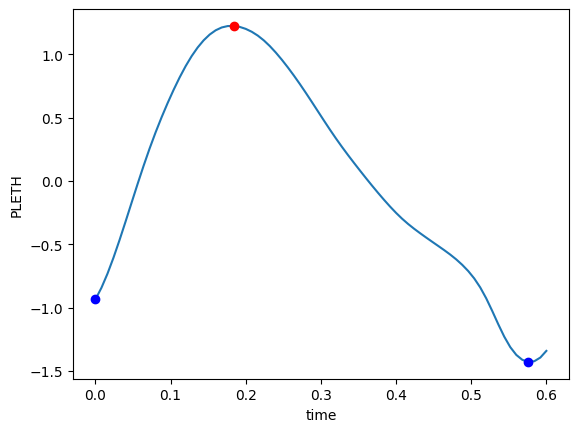

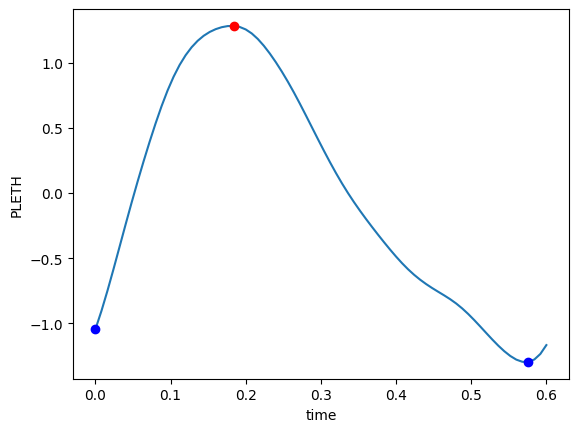

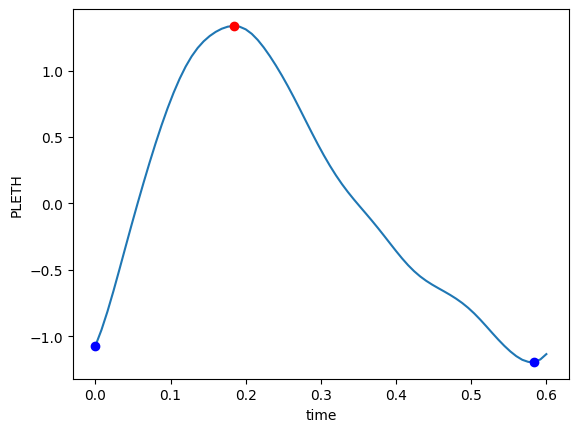

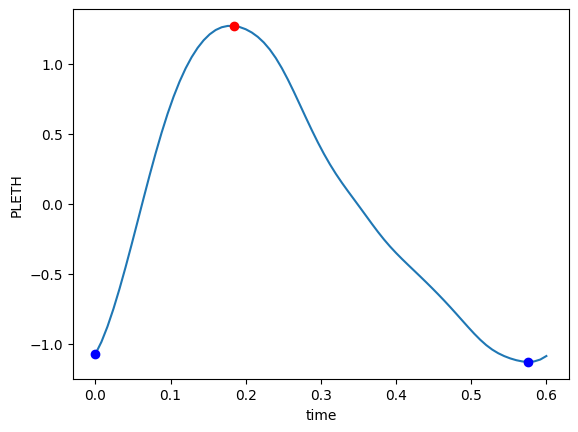

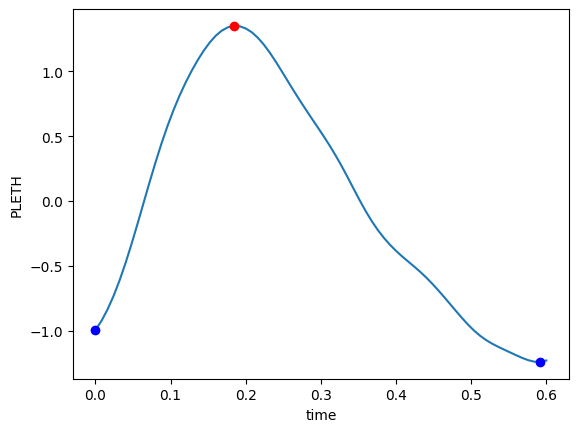

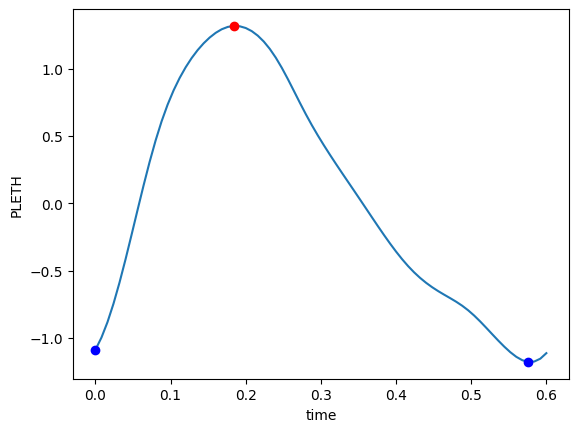

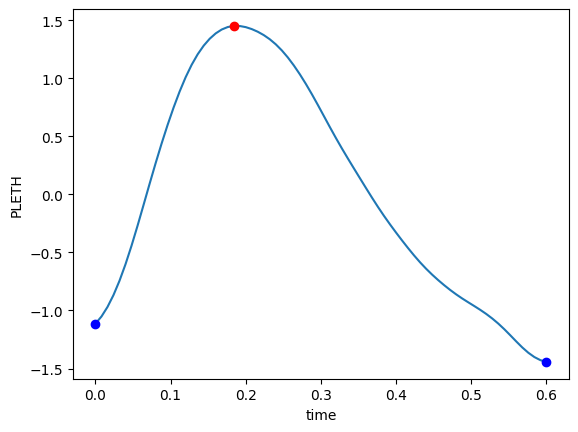

In [11]:
for Seg in SegList_Selected:

        # Detect peaks (systolic points) and foots (valleys)
        peaks, _ = find_peaks(Seg, distance=sampling_rate//2)
        foots, _ = find_peaks(-np.array(Seg), distance=sampling_rate//2)
    
        # Must have at least two foots
        # if len(foots) < 2 and len(peaks)==1:
            # raise ValueError("Not enough foot points detected.")
            #  foots = np.append(foots, len(Seg)-1)
    
        # Match each beat: find for each peak the nearest previous foot and the next foot
    
        peak = max(peaks, key=lambda x: Seg[x])
        # for peak in peaks:
        prev_foots = foots[foots < peak]
        next_foots = foots[foots > peak]

        if len(prev_foots) == 0:
            prev_foots = np.append(prev_foots, 0)
        if len(next_foots) == 0:
            next_foots = np.append(next_foots, len(Seg)-1)

        foot_before = prev_foots[-1]
        foot_after = next_foots[0]
        PlotSeg(Seg, peaks=[peak], foots=[foot_before, foot_after])

            # valid_beats.append((Seg, foot_before, peak, foot_after))